# Module 5 - Linear Model Selection and Regularization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Introductory Example

In [4]:
brand_ratings = pd.read_csv('brand_ratings.csv')
brand_ratings

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a
...,...,...,...,...,...,...,...,...,...,...
995,2,2,3,6,4,8,5,1,2,j
996,3,2,6,7,1,3,3,2,1,j
997,1,1,10,10,1,6,5,5,2,j
998,1,1,7,5,1,1,2,5,1,j


In [6]:
brand_ratings.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


Scale the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = True, with_std = True)

In [16]:
scaler.fit(brand_ratings.drop('brand',1))

StandardScaler()

In [14]:
print(scaler.mean_)

[4.488 4.417 6.195 6.068 4.323 4.259 4.337 5.22  3.727]


In [42]:
scaled_brand_ratings = scaler.fit_transform(brand_ratings.drop('brand',1))
scaled_brand_ratings = pd.DataFrame(scaled_brand_ratings, columns = brand_ratings.drop('brand',1).columns)
scaled_brand_ratings['brand'] = brand_ratings['brand']
col = scaled_brand_ratings.pop('brand')
scaled_brand_ratings.insert(loc= 0 , column= 'brand', value= col)
scaled_brand_ratings

,brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,a,-0.777050,-0.159946,0.586702,0.704370,-0.836572,1.778524,1.110796,-0.445137,0.893714
1,a,-1.089370,-1.310638,-0.713468,0.339789,-1.196697,-1.222571,-1.391936,-1.174870,-0.679034
2,a,-0.777050,-0.543510,-0.388426,1.068950,-0.836572,1.778524,0.276552,-1.539736,0.893714
3,a,-1.089370,0.607182,1.236787,0.704370,-0.476446,-0.097160,0.276552,-1.174870,-1.072221
4,a,-1.089370,-1.310638,-0.388426,0.704370,-1.196697,1.778524,1.945040,-1.539736,-1.072221
...,...,...,...,...,...,...,...,...,...,...
995,j,-0.777050,-0.927074,-1.038511,-0.024791,-0.116321,1.403387,0.276552,-1.539736,-0.679034
996,j,-0.464731,-0.927074,-0.063383,0.339789,-1.196697,-0.472297,-0.557692,-1.174870,-1.072221
997,j,-1.089370,-1.310638,1.236787,1.433531,-1.196697,0.653113,0.276552,-0.080271,-0.679034
998,j,-1.089370,-1.310638,0.261659,-0.389372,-1.196697,-1.222571,-0.974814,-0.080271,-1.072221


<AxesSubplot:ylabel='brand'>

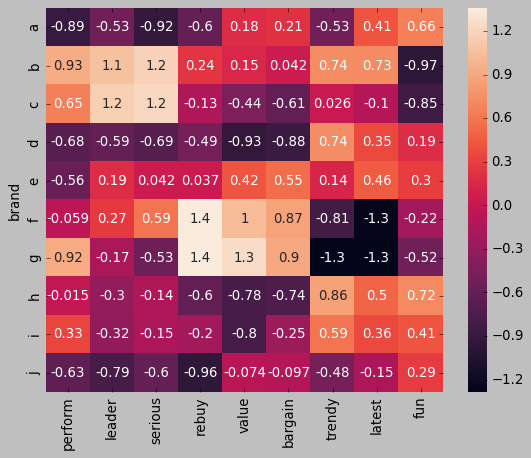

In [83]:
brand_ratings = pd.DataFrame(scaled_brand_ratings.groupby('brand').mean(), columns = sorted_index)
sns.heatmap(brand_ratings, annot=True)